In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
df=pd.read_excel("Resturant_Train (2).xlsx")

In [3]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [8]:
df.drop(['RESTAURANT_ID','TIME','LOCALITY','TITLE'],axis=1,inplace=True)

In [9]:
df

,CUISINES,CITY,RATING,VOTES,COST
0,"Malwani, Goan, North Indian",Thane,3.6,49 votes,1200
1,"Asian, Modern Indian, Japanese",Chennai,4.2,30 votes,1500
2,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221 votes,800
3,"Tibetan, Chinese",Mumbai,4.1,24 votes,800
4,Desserts,Mumbai,3.8,165 votes,300
...,...,...,...,...,...
12685,"North Indian, Burger, Kebab",Hyderabad,3.8,546 votes,500
12686,"Goan, Continental",Mumbai,4.3,1214 votes,1800
12687,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,4.0,608 votes,1300
12688,"North Indian, South Indian, Chinese, Street Food",Chennai,3.5,32 votes,400


In [10]:
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [11]:
df['RATING']=df['RATING'].astype(float)

In [12]:
df

,CUISINES,CITY,RATING,VOTES,COST
0,"Malwani, Goan, North Indian",Thane,3.6,49.0,1200
1,"Asian, Modern Indian, Japanese",Chennai,4.2,30.0,1500
2,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221.0,800
3,"Tibetan, Chinese",Mumbai,4.1,24.0,800
4,Desserts,Mumbai,3.8,165.0,300
...,...,...,...,...,...
12685,"North Indian, Burger, Kebab",Hyderabad,3.8,546.0,500
12686,"Goan, Continental",Mumbai,4.3,1214.0,1800
12687,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,4.0,608.0,1300
12688,"North Indian, South Indian, Chinese, Street Food",Chennai,3.5,32.0,400


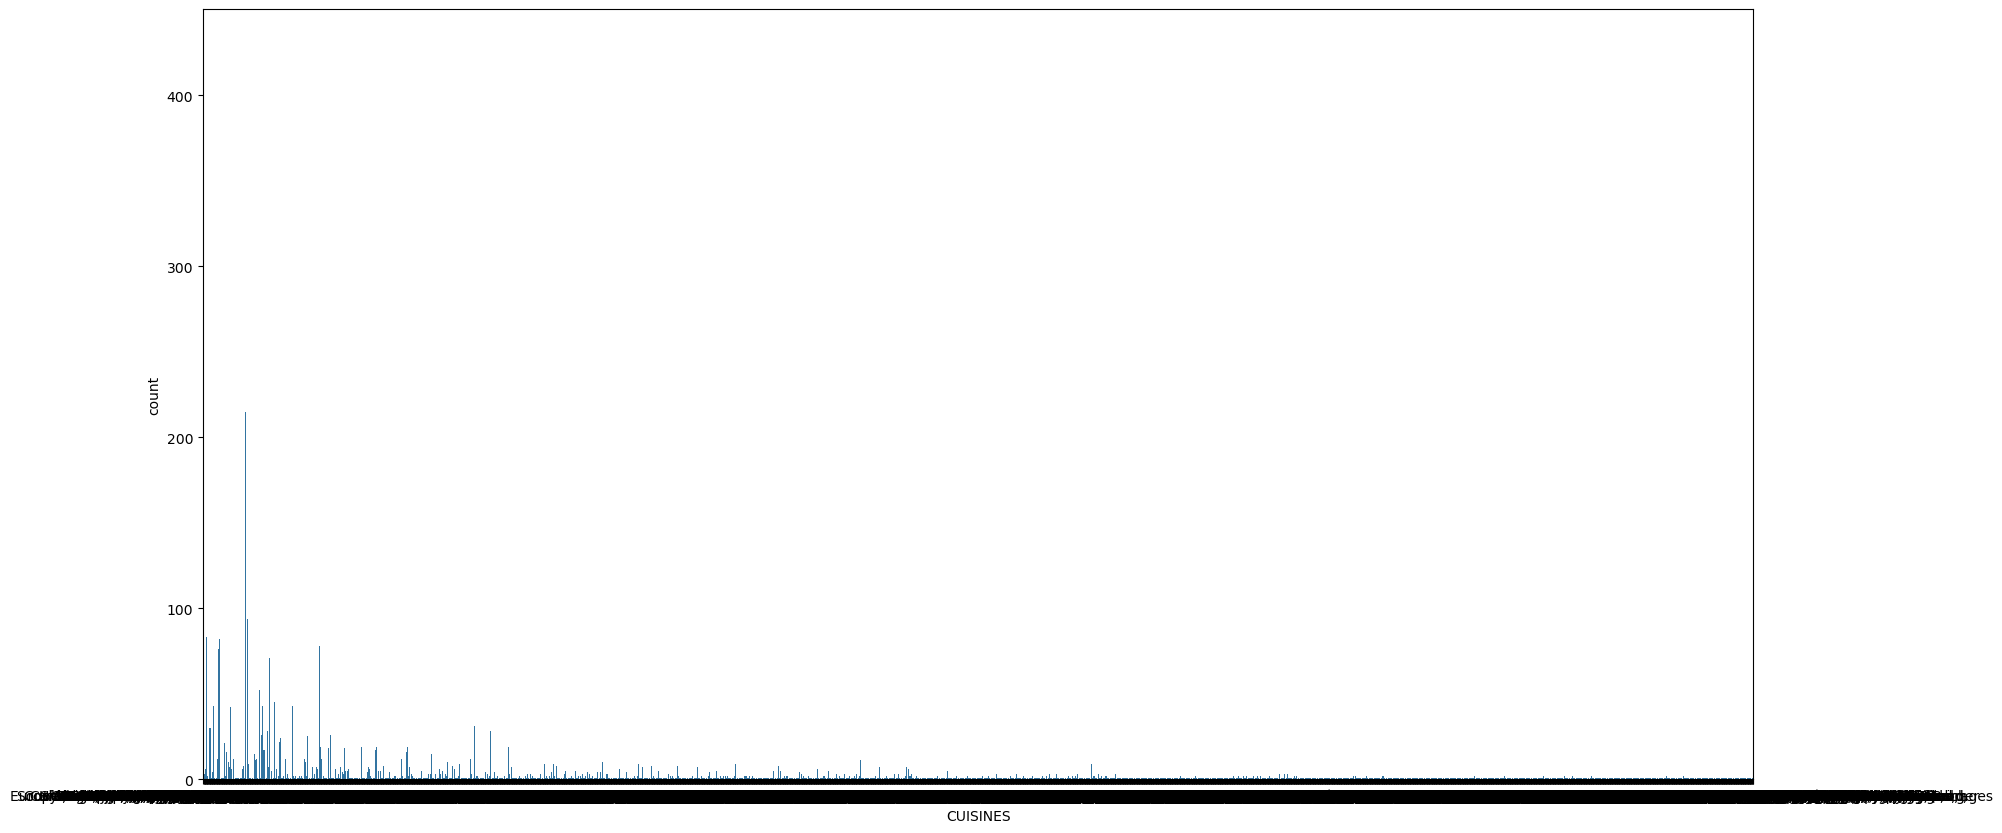

In [13]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="CUISINES",data=df)
plt.show()

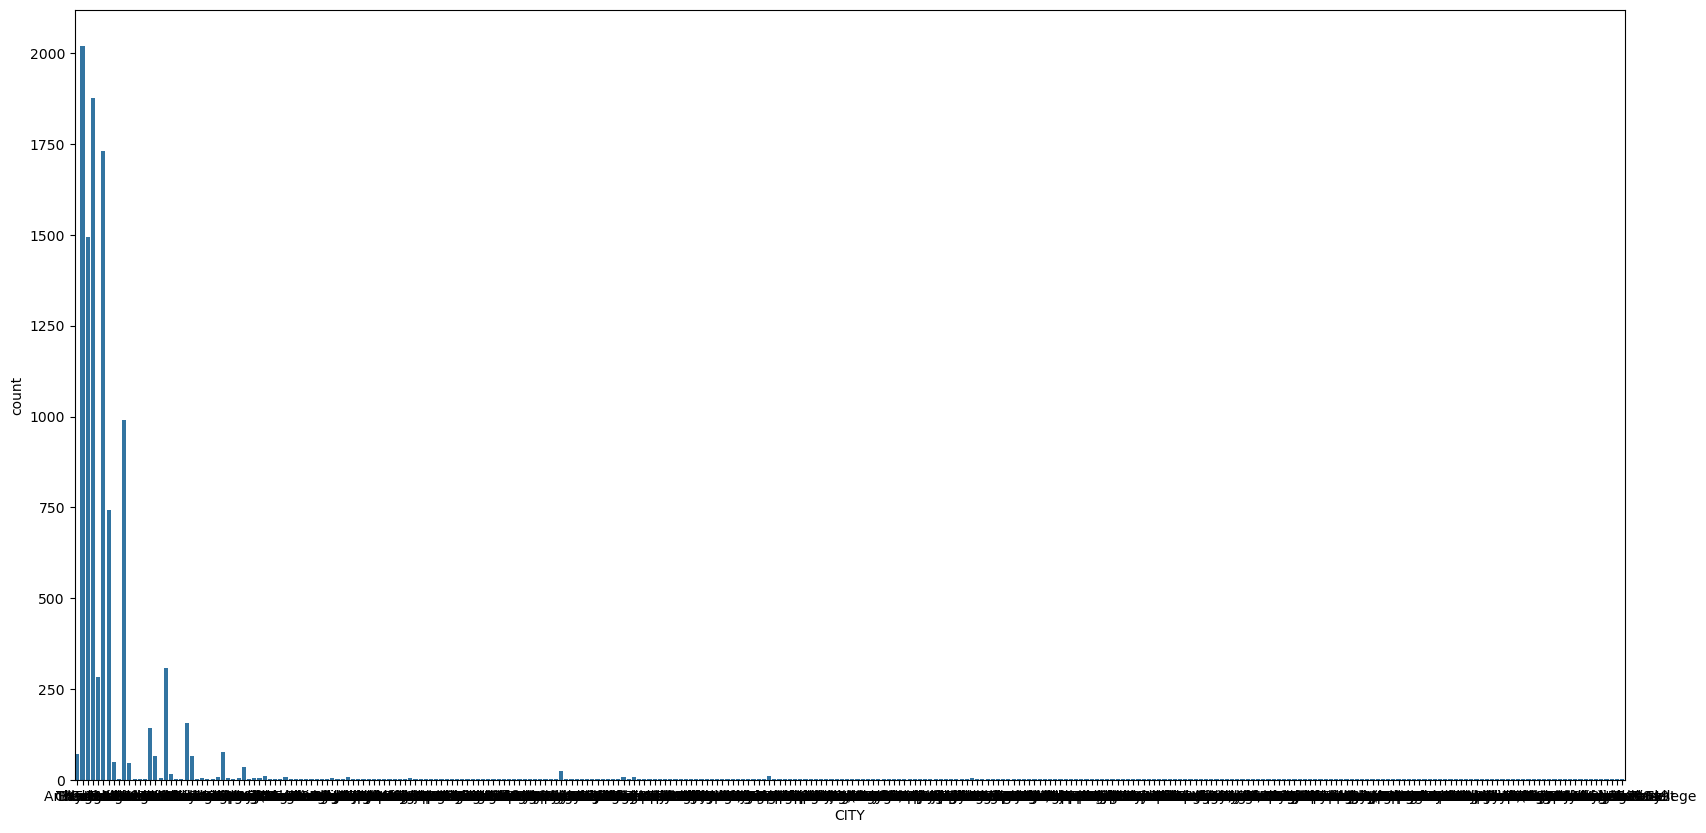

In [14]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="CITY",data=df)
plt.show()

In [15]:
my_obj_df=df.select_dtypes(include='object')

In [16]:
my_numeric_df=df.select_dtypes(exclude='object')

In [17]:
my_obj_df

,CUISINES,CITY
0,"Malwani, Goan, North Indian",Thane
1,"Asian, Modern Indian, Japanese",Chennai
2,"North Indian, Chinese, Biryani, Hyderabadi",Chennai
3,"Tibetan, Chinese",Mumbai
4,Desserts,Mumbai
...,...,...
12685,"North Indian, Burger, Kebab",Hyderabad
12686,"Goan, Continental",Mumbai
12687,"Finger Food, Continental, Asian, Chinese",Navi Mumbai
12688,"North Indian, South Indian, Chinese, Street Food",Chennai


In [18]:
my_numeric_df

,RATING,VOTES,COST
0,3.6,49.0,1200
1,4.2,30.0,1500
2,3.8,221.0,800
3,4.1,24.0,800
4,3.8,165.0,300
...,...,...,...
12685,3.8,546.0,500
12686,4.3,1214.0,1800
12687,4.0,608.0,1300
12688,3.5,32.0,400


In [19]:
df_obj_dummies=pd.get_dummies(my_obj_df,drop_first=True,dtype=int)

In [20]:
df_obj_dummies

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_West Mumbai,CITY_Whitefield Bangalore,CITY_aluva circle,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
final_df=pd.concat([df_obj_dummies,my_numeric_df],axis=1)

In [22]:
final_df

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi,RATING,VOTES,COST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.6,49.0,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.2,30.0,1500
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.8,221.0,800
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.1,24.0,800
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.8,546.0,500
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.3,1214.0,1800
12687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,608.0,1300
12688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.5,32.0,400


In [23]:
X=final_df.drop('COST',axis=1)
Y=final_df['COST']

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_aluva circle,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi,RATING,VOTES
0,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,-0.435522,-0.437604
1,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.983794,-0.459425
2,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.037583,-0.240068
3,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.747241,-0.466316
4,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.037583,-0.304382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.037583,0.133184
10589,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,1.220346,0.900360
10590,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,0.510688,0.204389
10591,-0.027492,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.009717,-0.009717,...,-0.009717,-0.009717,-0.009717,-0.009717,-0.009717,-0.013742,-0.009717,-0.013742,-0.672075,-0.457128


In [27]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(Y_test, pred,squared=False)
    print("RMSE Score is:", rmse)
    r2 = r2_score(Y_test, pred)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [28]:
model=LinearRegression()
reg(model,x,Y)

RMSE Score is: 2.0069148045905933e+17
R2 Score is: -7.758496537152771e+30
Cross Validation Score: -1.5727987687032755e+31
R2 Score - Cross Validation Score is 7.969491149879984e+30


In [29]:
from sklearn.linear_model import Ridge

In [30]:
model=Ridge()
reg(model,x,Y)

RMSE Score is: 617.3329851444465
R2 Score is: 26.589418767712825
Cross Validation Score: 27.058094509640195
R2 Score - Cross Validation Score is -0.4686757419273704


In [31]:
from sklearn.linear_model import Lasso

In [32]:
model=Lasso()
reg(model,x,Y)

RMSE Score is: 628.2789531006183
R2 Score is: 23.96304439718804
Cross Validation Score: 24.412141874491972
R2 Score - Cross Validation Score is -0.44909747730393335


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [34]:
model=RandomForestRegressor(max_depth=2)
reg(model,x,Y)

RMSE Score is: 660.7458236406029
R2 Score is: 15.90144168407167
Cross Validation Score: 16.05873244706518
R2 Score - Cross Validation Score is -0.15729076299350808


In [35]:
model=KNeighborsRegressor(n_neighbors=2)
reg(model,x,Y)

RMSE Score is: 664.2684949977559
R2 Score is: 15.002332576489241
Cross Validation Score: 6.203617658160192
R2 Score - Cross Validation Score is 8.79871491832905


In [36]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, x, Y)

RMSE Score is: 817.4555591788409
R2 Score is: -28.7205837280625
Cross Validation Score: -37.08839368451665
R2 Score - Cross Validation Score is 8.367809956454153


In [37]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05)
reg(model, x, Y)

RMSE Score is: 732.6357098703246
R2 Score is: -3.3941252846857006
Cross Validation Score: -352.0492524962131
R2 Score - Cross Validation Score is 348.65512721152743


In [38]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, x, Y)

RMSE Score is: 622.2180520329256
R2 Score is: 25.422999661137847
Cross Validation Score: 23.23670531599001
R2 Score - Cross Validation Score is 2.186294345147836


In [39]:
model=XGBRegressor()
reg(model,x, Y)

RMSE Score is: 614.2600472501074
R2 Score is: 27.31844088383668
Cross Validation Score: 28.266109018847125
R2 Score - Cross Validation Score is -0.9476681350104457


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
base=Ridge()
params={'alpha':np.arange(0.001,0.1,0.001)}
grid_model=GridSearchCV(base,param_grid=params,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=101)

In [46]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ........................................alpha=0.001; total time=   4.3s
[CV] END ........................................alpha=0.001; total time=   3.8s
[CV] END ........................................alpha=0.001; total time=   3.9s
[CV] END ........................................alpha=0.001; total time=   3.9s
[CV] END ........................................alpha=0.001; total time=   4.3s
[CV] END ........................................alpha=0.002; total time=   4.3s
[CV] END ........................................alpha=0.002; total time=   4.2s
[CV] END ........................................alpha=0.002; total time=   3.9s
[CV] END ........................................alpha=0.002; total time=   4.2s
[CV] END ........................................alpha=0.002; total time=   3.9s
[CV] END ........................................alpha=0.003; total time=   3.9s
[CV] END ......................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099])},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
grid_model.best_params_

{'alpha': 0.056}

In [48]:
final_model=Ridge(alpha=0.056)

In [49]:
final_model.fit(X_train,Y_train)

Ridge(alpha=0.056)

In [50]:
pred=final_model.predict(X_test)

In [51]:
rmse = mean_squared_error(Y_test, pred)
print("RMSE Score is:", rmse)
r2 = r2_score(Y_test, pred)*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, x, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 379007.6802727457
R2 Score is: 26.992461195862894
Cross Validation Score: 28.266109018847125
R2 Score - Cross Validation Score is -1.2736478229842305


In [52]:
import joblib
joblib.dump(final_model,'Cuisine_Cost_Predicting.pkl')

['Cuisine_Cost_Predicting.pkl']

In [55]:
df1=pd.read_excel("Resturant_Test (1).xlsx")

In [56]:
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [57]:
df1.drop(['RESTAURANT_ID','TIME','LOCALITY','TITLE'],axis=1,inplace=True)

In [58]:
df1['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [60]:
df1=df1.dropna()

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3797 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CUISINES  3797 non-null   object 
 1   CITY      3797 non-null   object 
 2   RATING    3797 non-null   object 
 3   VOTES     3797 non-null   float64
dtypes: float64(1), object(3)
memory usage: 148.3+ KB


In [65]:
df1['RATING']=df1['RATING'].astype(float)

In [66]:
my_obj_df1=df1.select_dtypes(include='object')

In [67]:
my_numeric_df1=df1.select_dtypes(exclude='object')

In [68]:
my_obj_df1

,CUISINES,CITY
0,"North Indian, Chinese, Mughlai, Kebab",Noida
1,"South Indian, Fast Food, Pizza, North Indian",Mumbai
2,"North Indian, Seafood, Biryani, Chinese",Mumbai
3,Biryani,Faridabad
4,"South Indian, Kerala",Kochi
...,...,...
4225,"North Indian, Mughlai, Chinese",Mumbai
4226,"North Indian, Mughlai, Chinese",New Delhi
4227,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore
4228,"Continental, North Indian",Faridabad


In [69]:
df_obj_dummies1=pd.get_dummies(my_obj_df,drop_first=True,dtype=int)

In [70]:
df_obj_dummies1

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_West Mumbai,CITY_Whitefield Bangalore,CITY_aluva circle,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
final_df1=pd.concat([df_obj_dummies1,my_numeric_df1],axis=1)

In [72]:
final_df1

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_aluva circle,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi,RATING,VOTES
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,564.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,61.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,350.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,1445.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,1246.0
4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,6.0
4222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,245.0
4226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,287.0


In [73]:
model=joblib.load("Cuisine_Cost_Predicting.pkl")

In [74]:
final_df1=final_df1.dropna()

In [75]:
final_df1

,CUISINES_American,"CUISINES_American, Arabian, Fast Food, Lebanese","CUISINES_American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","CUISINES_American, Asian, Cafe, Continental, Italian, Burger, Pizza","CUISINES_American, Asian, Continental, North Indian, South Indian, Chinese","CUISINES_American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","CUISINES_American, BBQ","CUISINES_American, Beverages","CUISINES_American, Burger","CUISINES_American, Burger, Continental, Sandwich",...,CITY_aluva circle,CITY_bangalore : 560085,CITY_chennai,CITY_chullickal,CITY_hyderabad,CITY_kochi,CITY_navi mumbai,CITY_p.o Kochi,RATING,VOTES
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,564.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,61.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,350.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,1445.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,441.0
4224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,410.0
4225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,197.0
4227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,469.0


In [76]:
prediction=model.predict(final_df1)
prediction

array([42018.33538092,  5424.98650443, 26405.52699263, ...,
       15177.32822802, 35116.70920319,  4787.77495695])

In [77]:
df2=pd.DataFrame()
df2['Predicted']=prediction

In [78]:
df2

,Predicted
0,42018.335381
1,5424.986504
2,26405.526993
3,106065.243601
4,2597.740394
...,...
3156,33033.075558
3157,30835.411008
3158,15177.328228
3159,35116.709203
